# Iris Dataset

In [22]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn import model_selection
import seaborn as sns
sns.set_style('whitegrid')
sns.despine()

from ibex import trans
from ibex.sklearn import linear_model as pd_linear_model
from ibex.sklearn import decomposition as pd_decomposition
from ibex.sklearn import preprocessing as pd_preprocessing
from ibex.sklearn import ensemble as pd_ensemble

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [18]:
iris = datasets.load_iris()
features = iris['feature_names']
iris = pd.DataFrame(
    np.c_[iris['data'], iris['target']], 
    columns=features+['class'])
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [19]:
iris, iris_te = model_selection.train_test_split(iris, stratify=iris['class'], test_size=0.1)
iris.reset_index(inplace=True)
iris_te.reset_index(inplace=True)

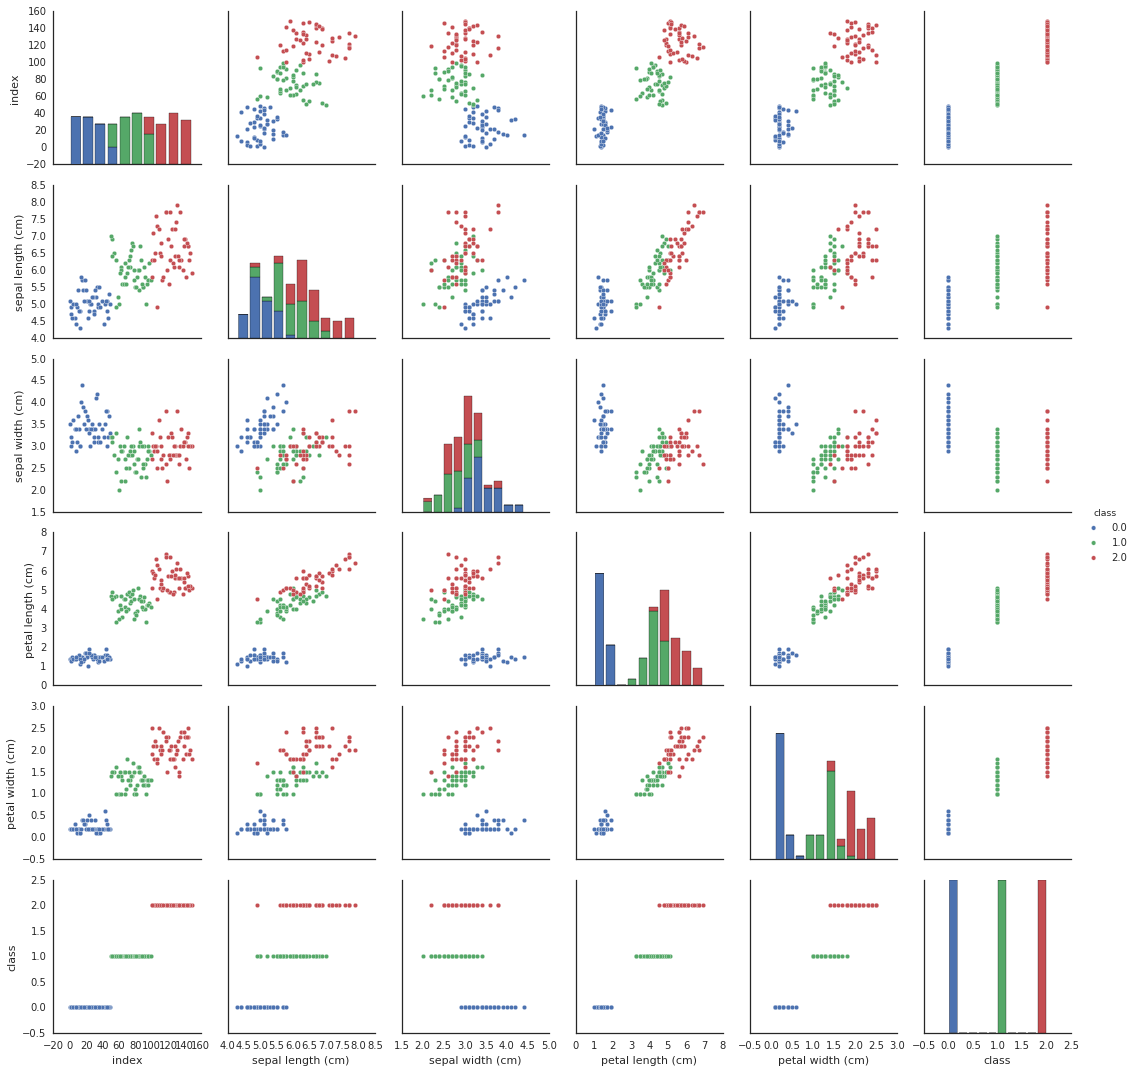

In [20]:
sns.pairplot(iris, 'class');

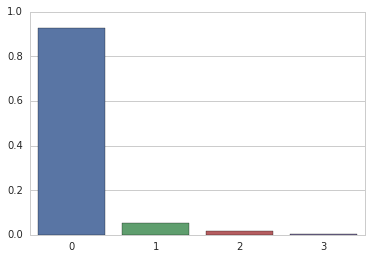

In [23]:
sns.barplot(
    data=pd.DataFrame(pd_decomposition.PCA().fit(iris[features]).explained_variance_ratio_).T);

In [7]:
decomp = trans(
    {('pc1', 'pc2'): pd_decomposition.PCA(n_components=2)}, 
    columns=features)

TypeError: trans() got an unexpected keyword argument 'columns'

In [8]:
pca = decomp.fit_transform(iris)
pca['class'] = iris['class']
sns.lmplot('pc1', 'pc2', data=pca, hue='class');

NameError: name 'decomp' is not defined

In [ ]:
clf = decomp | pd_linear_model.LogisticRegression()
clf

In [ ]:
scores = model_selection.cross_val_score(
    clf,
    X=iris,
    y=iris['class'],
    cv=10)
sns.boxplot(x=scores, orient='v');

In [ ]:
from sklearn import ensemble
clf = ensemble.GradientBoostingClassifier()
scores = model_selection.cross_val_score(
    clf,
    X=iris,
    y=iris['class'],
    cv=10)
sns.boxplot(x=scores, orient='v');

In [7]:
import numpy as np
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()
iris = pd.DataFrame(
    np.c_[iris['data'], iris['target']],
    columns=iris['feature_names']+['class'])

from ibex.sklearn.svm import SVC 
from ibex.sklearn.decomposition import PCA 
from ibex.sklearn.feature_selection import SelectKBest

clf = PCA(n_components=2) + SelectKBest(k=1) | SVC(kernel="linear")

In [8]:
clf

Pipeline(steps=[('featureunion', FeatureUnion(n_jobs=1,
       transformer_list=[('pca', Adapter[PCA](copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('selectkbest', Adapter[SelectKBest](k=1, score_func=<function f_classif at 0x7f7c8951eb70>)...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [9]:
clf.get_params()

{'featureunion': FeatureUnion(n_jobs=1,
        transformer_list=[('pca', Adapter[PCA](copy=True, iterated_power='auto', n_components=2, random_state=None,
   svd_solver='auto', tol=0.0, whiten=False)), ('selectkbest', Adapter[SelectKBest](k=1, score_func=<function f_classif at 0x7f7c8951eb70>))],
        transformer_weights=None),
 'featureunion__n_jobs': 1,
 'featureunion__pca': Adapter[PCA](copy=True, iterated_power='auto', n_components=2, random_state=None,
   svd_solver='auto', tol=0.0, whiten=False),
 'featureunion__pca__copy': True,
 'featureunion__pca__iterated_power': 'auto',
 'featureunion__pca__n_components': 2,
 'featureunion__pca__random_state': None,
 'featureunion__pca__svd_solver': 'auto',
 'featureunion__pca__tol': 0.0,
 'featureunion__pca__whiten': False,
 'featureunion__selectkbest': Adapter[SelectKBest](k=1, score_func=<function f_classif at 0x7f7c8951eb70>),
 'featureunion__selectkbest__k': 1,
 'featureunion__selectkbest__score_func': <function sklearn.feature_sele

In [10]:
clf.steps

[('featureunion', FeatureUnion(n_jobs=1,
         transformer_list=[('pca', Adapter[PCA](copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)), ('selectkbest', Adapter[SelectKBest](k=1, score_func=<function f_classif at 0x7f7c8951eb70>))],
         transformer_weights=None)),
 ('svc', Adapter[SVC](C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False))]

In [11]:
from sklearn.pipeline import FeatureUnion

In [12]:
FeatureUnion([('a', pd_linear_model.LinearRegression()), ('b', pd_linear_model.LinearRegression())])

TypeError: All estimators should implement fit and transform. 'Adapter[LinearRegression](copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)' (type <class 'ibex._adapter.frame.<locals>._Adapter'>) doesn't

In [22]:
from sklearn import linear_model
type(linear_model.LinearRegression())

sklearn.linear_model.base.LinearRegression

In [24]:
pd_linear_model.LinearRegression.__name__ = 'moshe'

In [26]:
type(pd_linear_model.LinearRegression).__name__

'ABCMeta'

In [30]:
pd_linear_model.LinearRegression.__name__ = 'moshe'
pd_linear_model.LinearRegression.__name__

'moshe'

In [29]:
linear_model.LinearRegression.__name__

'LinearRegression'

In [3]:
type(pd_linear_model.LinearRegression()).__name__

'LinearRegression'

In [14]:
from sklearn import model_selection
from sklearn import linear_model

In [15]:
model_selection.GridSearchCV(linear_model.LinearRegression(), {}).sc

GridSearchCV(cv=None, error_score='raise',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
       fit_params={}, iid=True, n_jobs=1, param_grid={},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)